In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('salaries-merged.csv')

In [3]:
sal.head(5)

,Unnamed: 0,function,sup1,sup2,sup3,sup4,sup5,salary,gender,disabled,...,sex_by_age:__female:_67_to_69_years_,sex_by_age:__female:_70_to_74_years_,sex_by_age:__female:_75_to_79_years_,sex_by_age:__female:_80_to_84_years_,sex_by_age:__female:_85_years_and_over_,commute_over_60,full_time,part_time,high_rent_burden,extreme_rent_burden
0,2211,position22,0,0,0,4,1,49088,Man,False,...,0,0,0,0,0,0,65.276074,34.723926,37.5,37.5
1,2212,position15,0,0,0,0,0,48131,Man,True,...,0,0,0,0,0,0,65.276074,34.723926,37.5,37.5
2,2216,position20,1,0,1,6,1,51625,Man,False,...,0,0,0,0,0,0,65.276074,34.723926,37.5,37.5
3,2217,position6,0,0,1,30,5,54225,Woman,False,...,0,0,0,0,0,0,65.276074,34.723926,37.5,37.5
4,2218,position10,0,0,0,7,0,67495,Woman,False,...,0,0,0,0,0,0,65.276074,34.723926,37.5,37.5


In [4]:
sal.mean()

Unnamed: 0                                    1110.500000
sup1                                             1.431593
sup2                                             0.763726
sup3                                             0.624212
sup4                                            49.639514
sup5                                             3.945995
salary                                       48756.163901
disabled                                         0.013051
yearsinposition                                  5.689307
yearsinprofession                                9.327103
age                                             38.260094
cred1                                            0.069307
cred2                                            0.031503
inst1                                           16.674617
inst2                                            6.648965
inst3                                            3.680468
inst4                                          336.729523
inst5         

In [5]:
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]
# elminates missing Y values

In [6]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsinposition', 
         'yearsinprofession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instbudget', 'instsize']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['function', 'gender', 'race', 'highestdegree', 'category', 'insttype']
X_categorical = sal2[X_categorical_features]

In [7]:
# extra data
# X_extra_features = ['median', 'mean', 'pop', 'snap', 'renter', 'median_rent', 'full_time', 'high_rent_burden']
# X_extra = sal2[X_extra_features]

X_extra = sal2.iloc[:,30:124].values

In [8]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

function_dummies = pd.get_dummies(X_categorical['function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestdegree_dummies = pd.get_dummies(X_categorical['highestdegree'])
category_dummies = pd.get_dummies(X_categorical['category'])
insttype_dummies = pd.get_dummies(X_categorical['insttype'])

X_dummy_features = pd.concat([function_dummies, gender_dummies, race_dummies, highestdegree_dummies, category_dummies, insttype_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

In [9]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [10]:
imp.fit(X_extra)
X_extra_imputed = imp.transform(X_extra)

In [11]:
X = np.concatenate((X_dummy_features, X_numeric_imputed, X_extra_imputed), axis=1)

In [12]:
# y is salary
y = sal2.iloc[:, 7].values

In [13]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [14]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [15]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 28248.0356464
Coefficients: 
 [ -7.35946450e+03  -2.00257325e+04  -2.31755827e+04  -2.41310028e+04
  -1.81233763e+04  -1.24138167e+04  -2.35329824e+04  -2.51442971e+04
  -2.28206431e+04  -2.52211838e+04  -1.84598098e+04  -1.56031848e+04
  -2.55625859e+04  -2.79707899e+04  -2.12336769e+04  -2.59084211e+04
  -2.27557812e+04  -2.67280292e+04  -1.88797157e+04  -2.14092798e+04
  -1.68393593e+04  -1.59342539e+04  -2.25037476e+04  -2.11271744e+04
  -2.37600530e+04  -2.40041780e+04  -2.41613962e+04  -2.49893827e+04
  -2.24765467e+03  -3.68209727e+03  -4.24581929e+03  -3.97624752e+02
  -5.63246154e+03  -1.25083294e+03  -5.61532577e+03   3.37078765e+03
  -2.24283674e+03   4.71967140e+03   8.40343580e+03   1.96735069e+04
   1.24026067e+04   1.10561361e+03   1.79044623e+03  -1.79044623e+03
   1.31656366e+04   1.39615649e+04   1.38587122e+03   6.51539791e+02
  -1.04534720e+02   7.36015686e+00   2.30313357e+01   7.76247451e+02
   2.92823249e+01   4.78150236e+02   1.78812876e+02   1.4498

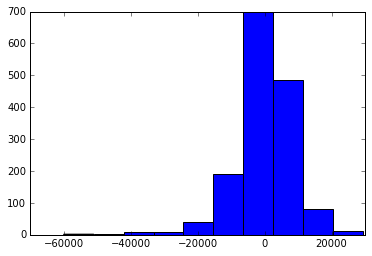

Distribution of prediction error on test data:


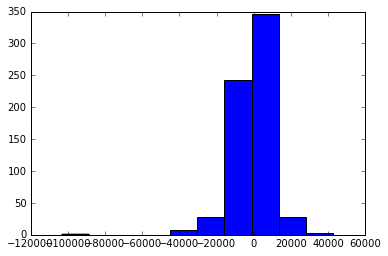

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [18]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 40744733561.0
Coefficients: 
 [  2.07537409e+08   2.45534106e+07   4.22621186e+07 ...,  -6.21331707e+04
   1.35036363e+05   2.34677005e+05]
Residual sum of squares, training data: 58162.61
Residual sum of squares, test data: 1123478604091223424.00
Variance score, training data: 1.00
Distribution of prediction error on training data:


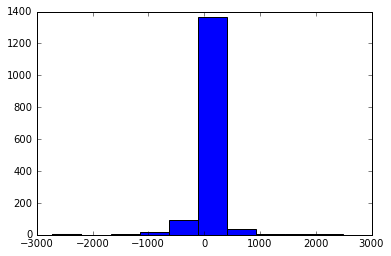

Distribution of prediction error on test data:


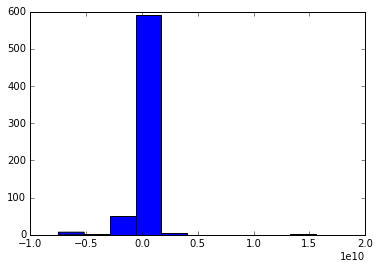

In [19]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 16277.4104161
Coefficients: 
 [  1.06231585e+04  -1.26751996e+03  -4.49830545e+03  -5.19001860e+03
   2.74163711e+02   6.15611219e+03  -5.03556844e+03  -5.87313906e+03
  -4.01951655e+03  -3.89859725e+03   1.16034577e+02   2.59228869e+03
  -6.68717448e+03  -8.58200438e+03  -2.55325310e+03  -4.73567384e+03
  -3.48532319e+03  -8.01737198e+03  -3.07426477e+02  -2.84192068e+03
   8.84490033e+02   2.37109094e+03  -3.81506727e+03  -2.31747233e+03
  -4.98701598e+03  -5.29089009e+03  -4.71001546e+03  -6.32337389e+03
  -8.22780525e+02  -2.24483229e+03  -3.40296052e+03   4.81638362e+02
  -4.10560523e+03  -4.50889355e+02  -4.52179257e+03   3.38991720e+03
  -1.21387614e+03   1.51719322e+03   4.98400852e+03   1.54331919e+04
   9.11036657e+03  -2.09061910e+03   2.59697221e+03  -2.59697221e+03
   5.87624269e+03   6.57111959e+03   1.43814956e+03   6.55119837e+02
  -1.19324378e+02   6.30133395e+00   2.21891656e+01   6.39083833e+02
  -5.98316574e+00   5.12634453e+02   1.78681953e+02   1.8791

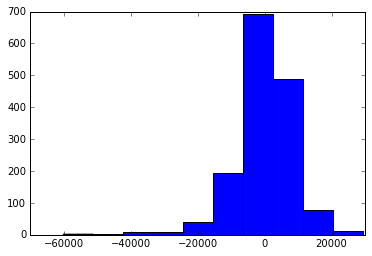

Distribution of prediction error on test data:


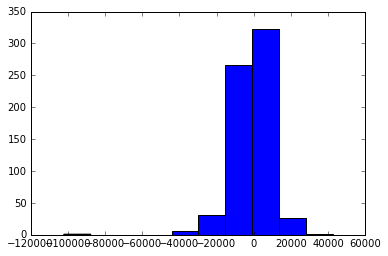

In [20]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

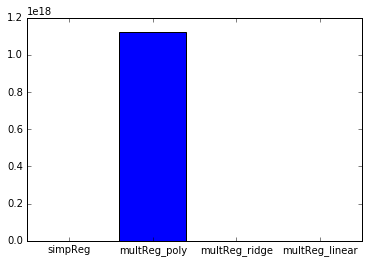

In [21]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()